# **CA-05: Logisitic Regression**

# Alena Sanchez 
*   Professor Brahma
*   April 04 2022

## Import Packages

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Read Data

In [28]:
url = "https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv"
data = pd.read_csv(url, encoding = "ISO-8859-1") 

In [29]:
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [30]:
data.tail()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


# Part One



*  Build a binary classifier model to predict the CVD Risk using a Logistic
Regression Model with the best performance possible.



In [32]:
#split the data

x = data.loc[:, data.columns != 'cvd_4types']
y = data.loc[:, data.columns == 'cvd_4types']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)
x_train

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
2620,56,1,3,1,118.0,37.0,116.0,85.0,12.00,0,0,0,3,2,4,4
1934,63,1,3,1,103.0,38.0,94.0,79.6,13.50,0,0,0,3,2,4,4
396,44,1,3,1,98.0,37.0,83.0,77.0,7.00,0,0,0,2,2,5,4
1106,73,1,2,1,95.0,38.0,100.0,84.8,0.00,2,1,0,2,2,5,4
1867,64,1,4,1,116.0,46.0,114.0,87.5,26.25,0,1,0,3,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,83,1,3,2,107.0,35.0,96.0,85.9,0.00,0,1,0,3,2,5,4
1599,59,1,2,1,139.0,39.6,135.0,91.9,24.00,0,0,0,1,3,3,3
1361,81,1,2,1,99.0,41.0,110.0,87.6,14.00,0,1,0,2,1,4,4
1547,62,1,3,3,107.0,36.0,109.0,84.4,0.00,0,0,0,3,1,5,4


In [33]:
model = LogisticRegression(solver = 'newton-cg', random_state=101)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [35]:
model = LogisticRegression(solver = 'liblinear', random_state=101)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


###*going to go with the model using the liblinear solver as it is the one that works best with smaller datasets.*
###### Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# Part Two

*   Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk.



In [46]:
importance = pd.DataFrame({"feature":x_train.columns.tolist(),"coefficients":abs(model.coef_[0])})
importance.sort_values(by = "coefficients", ascending=False)

#source: https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

,feature,coefficients
1,race,0.835409
15,hlthlm25,0.574986
11,parrptdiab,0.487852
2,educat,0.300273
3,mstat,0.140960
14,tired25,0.138130
12,bend25,0.118151
10,srhype,0.098597
6,waist,0.073862
4,hip,0.046018


In [ ]:
#We can conclude that race, hlthlm25, and parrptdiab have the highest influence on CVD risk.

#hlthlm25: Medical Outcomes Study SF-36: Frequency that physical health or emotional problems interefered with normal social activities

#parrptdiab: History of Diabetes (Sleep Heart Health Study Visit One (SHHS1))

# Part Three

*   Evaluate the performance of your model (including ROC Curve), explain the performance and
draw a meaningful conclusion.



In [57]:
#confusion matrix

matrix = confusion_matrix(y_test, y_pred).ravel()

print("TRUE NEGATIVE:")
print(matrix[0])
print("======")
print("FALSE POSITIVE:")
print(matrix[1])
print("======")
print("FALSE NEGATIVE:")
print(matrix[2])
print("======")
print("TRUE POSITIVE:")
print(matrix[3])

TRUE NEGATIVE:
217
FALSE POSITIVE:
241
FALSE NEGATIVE:
91
TRUE POSITIVE:
521


In [49]:
#accuracy
accuracy_score(y_test, y_pred)

0.6897196261682244

In [50]:
#precision 
precision_score(y_test, y_pred)

0.6837270341207349

In [51]:
#recall
recall_score(y_test, y_pred)

0.8513071895424836

In [52]:
#f1score
f1_score(y_test, y_pred)

0.7583697234352256

In [55]:
#AUC Value
auc = roc_auc_score(y_test,y_pred)
print(auc)

0.6625531580900191


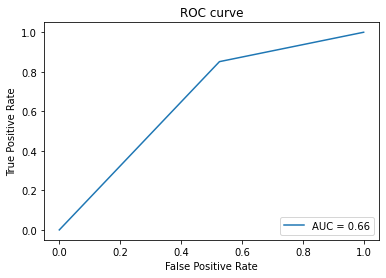

In [56]:
#ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title('ROC curve')
plt.show()

In [ ]:
#The Overall Performance of the model is not the strongest, given the case as we are trying to predict risk of CVD.
#When dealing with such critical cases, it is suggested that the AUC be higher. 
#As we can see there is a fairly high FPR